


## Regression Analysis with the Ames Housing Data

 

In [2]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
from sklearn.preprocessing import scale

sns.set_style('dark')
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
# Load the data
house = pd.read_csv('./housing.csv')

In [5]:
# First look at the data
house.info()x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# I then checked out my columns, that is alot!
house.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [5]:
# We were told to look at only residential 
# so I first checked the values of that column
house.MSZoning.value_counts().sum

<bound method Series.sum of RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64>

In [6]:
# I subset my dataframe
house = house[house.MSZoning != 'C (all)']

In [7]:
# double check my work
house.MSZoning.value_counts().sum

<bound method Series.sum of RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64>

In [8]:
# There are alot of columns to check out, first lets look 
# at the value counts for each column
# that has less than 15 types, this catches all of the categorical data, 
# right I away I see many issues
# I will handle these later in the notebook

for i in house.columns:
    if len(house[i].value_counts()) < 15:
        print house[i].value_counts()

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64
Pave    1446
Grvl       4
Name: Street, dtype: int64
Grvl    50
Pave    39
Name: Alley, dtype: int64
Reg    916
IR1    483
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1305
Bnk      62
HLS      49
Low      34
Name: LandContour, dtype: int64
AllPub    1449
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1044
Corner      261
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1375
Mod      62
Sev      13
Name: LandSlope, dtype: int64
Norm      1252
Feedr       79
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1436
Feedr        5
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64
1Fam      1211
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64
1Story    722
2S

In [9]:
# This table also provides some insight to how much missing data I am dealing with
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1443,0.995172
MiscFeature,1398,0.964138
Alley,1361,0.938621
Fence,1172,0.808276
FireplaceQu,681,0.469655
LotFrontage,259,0.178621
GarageCond,79,0.054483
GarageType,79,0.054483
GarageYrBlt,79,0.054483
GarageFinish,79,0.054483


In [10]:
# I immediately get rid of these columns, they will not provide any useful information to our prediction

house = house.drop('PoolQC', axis=1)

house = house.drop('PoolArea', axis=1)

house = house.drop('MiscFeature', axis=1)

house = house.drop('MiscVal', axis=1)

house = house.drop('Alley', axis=1)

house = house.drop('Fence', axis=1)

In [11]:
# I also drop this one row that has no electricity, this has red flags of an outlier in home shopping
# therefore useless to me

house = house.drop(house.loc[house['Electrical'].isnull()].index)

In [12]:
# I can engineer three features, that is indoor square footage, outdoor living space square footage, 
# and total bathrooms

house['TotalInSF'] = house['TotalBsmtSF'] + house['1stFlrSF'] + house['2ndFlrSF']
house['TotalOutSF'] = house['ScreenPorch'] + house['3SsnPorch'] + house['EnclosedPorch'] + house['OpenPorchSF'] + house['GarageArea'] + house['WoodDeckSF'] 
house['totalbath'] = house['FullBath'] + house['BsmtFullBath'] + house['BsmtHalfBath'] + house['HalfBath']

In [13]:
# Now that I consolidated all of those columns, I can remove them to avoid correlation

house = house.drop('TotalBsmtSF', axis=1)

house = house.drop('FullBath', axis=1)

house = house.drop('BsmtFullBath', axis=1)

house = house.drop('BsmtHalfBath', axis=1)

house = house.drop('HalfBath', axis=1)

house = house.drop('1stFlrSF', axis=1)

house = house.drop('2ndFlrSF', axis=1)

house = house.drop('ScreenPorch', axis=1)

house = house.drop('3SsnPorch', axis=1)

house = house.drop('EnclosedPorch', axis=1)

house = house.drop('WoodDeckSF', axis=1)

house = house.drop('OpenPorchSF', axis=1)

In [14]:
# That seemed harmless, lets take a break from our potential features and look at our target
house.SalePrice.describe()

count      1449.000000
mean     181664.710835
std       79202.946344
min       37900.000000
25%      130000.000000
50%      163900.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

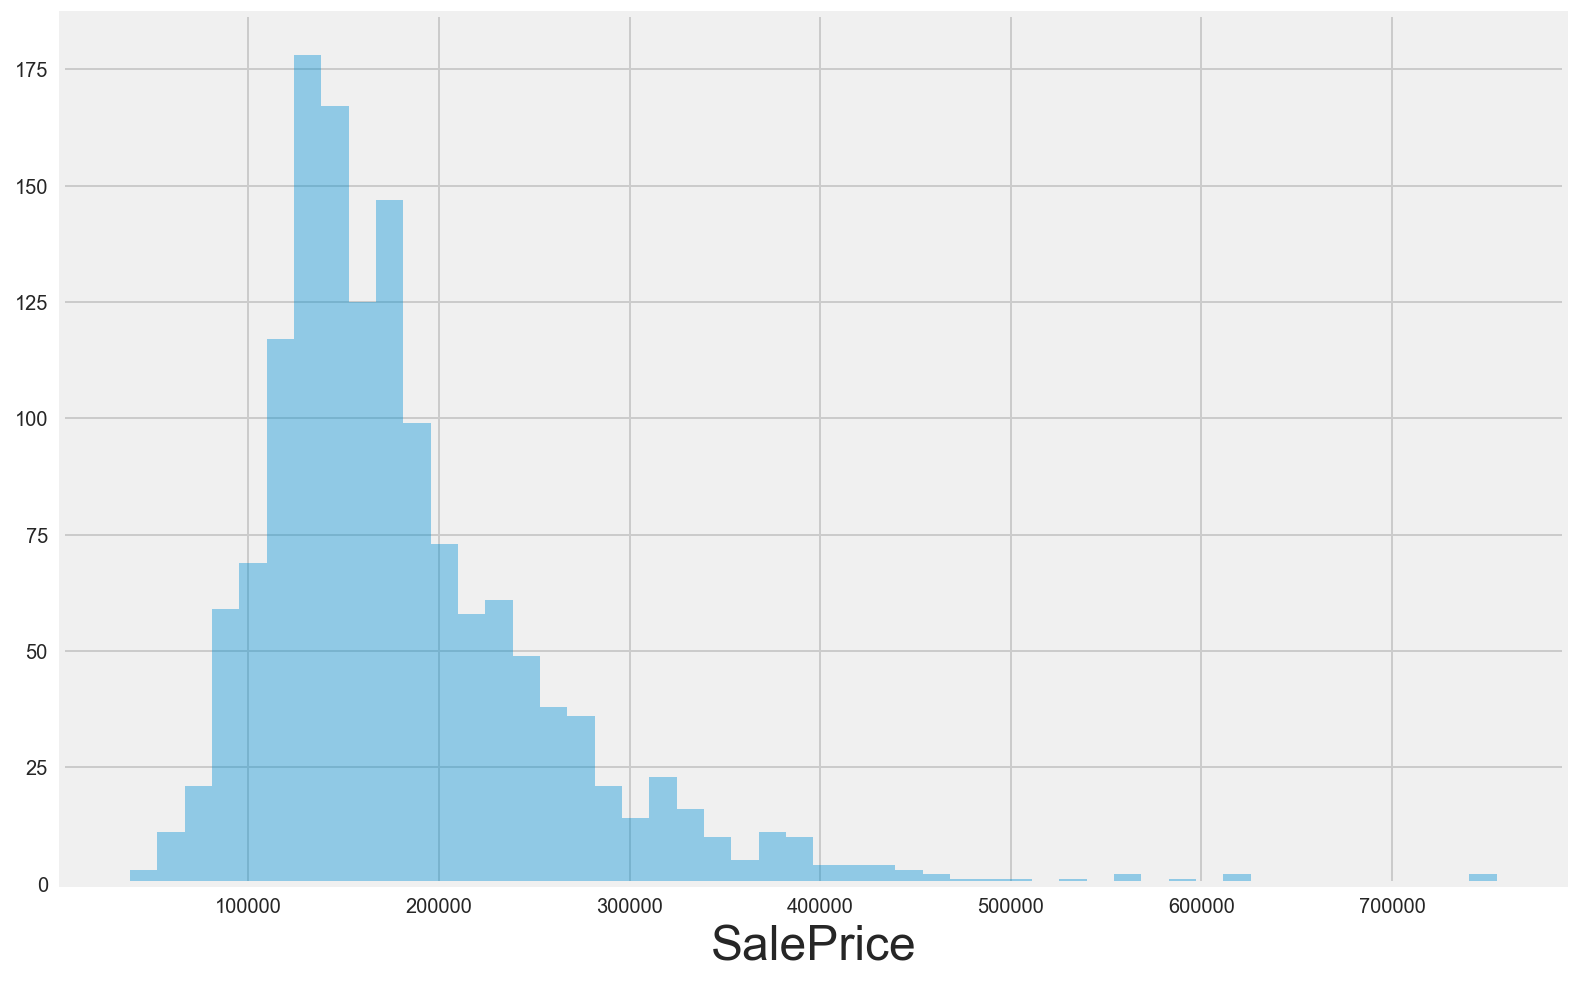

It is positivley skewed: 1.90548065282


In [15]:
# and the distribution, we have no negative values and it is clearly positivly skewed, which might make it a little
# awkward for linear regression, lets take the log and see what happens

plt.figure(figsize=(12,8))
sns.distplot(house.SalePrice.values, bins=50, kde=False)
plt.xlabel('SalePrice', fontsize=24)
plt.show()
print ("It is positivley skewed: " + str(sp.skew(house.SalePrice)))

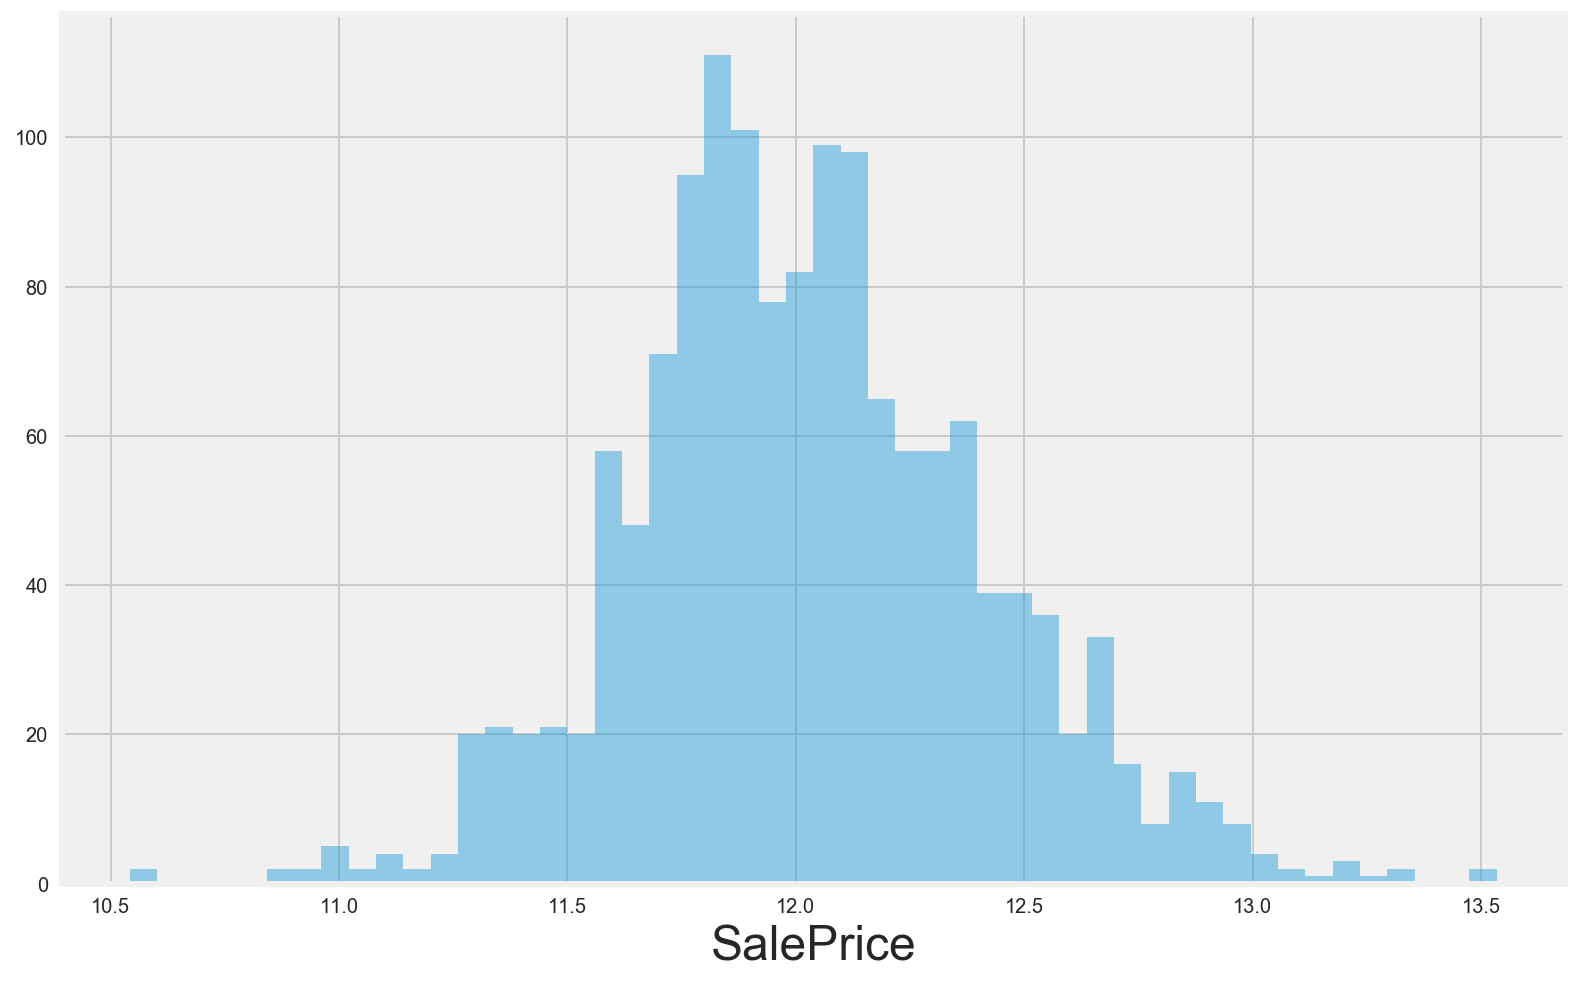

In [16]:
# that looks pretty, and much nicer for our regression, this might be useful to think about
# in the future...

plt.figure(figsize=(12,8))
sns.distplot(np.log(house.SalePrice.values), bins=50, kde=False)
plt.xlabel('SalePrice', fontsize=24)
plt.show()

In [69]:
# # Now that I know my target is clean and nice looking, back to feature selection
# # lets look at a correlation heat map, this is some code I found to sort my correlations and let me deal with
# # the number of columns appropriatly



In [18]:
# TotalIn and Totalout are doing what we want above ground living area is also highly correlated, lets drop total
# rooms above ground in order to keep Above ground living area, but above ground living are is less of a
# predictor than our total inside square feet feature so lets keep ours

house = house.drop('TotRmsAbvGrd', axis=1)

house = house.drop('GrLivArea', axis=1)

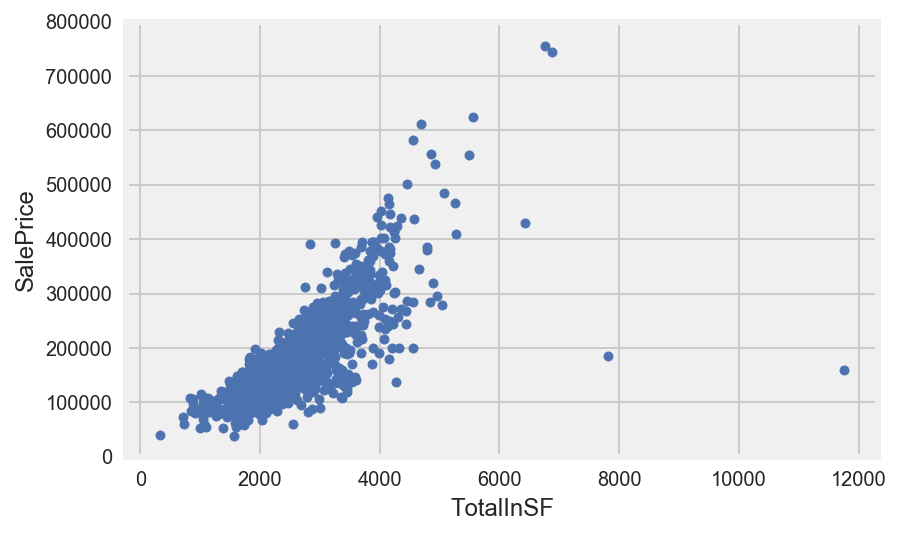

In [19]:
# lets double check our feature, since this has such a high correlation.
# The two values that have high square footage but a low sale price are definily outliers
# I think these properties will also address our 1 property with no sewage or water

var = 'TotalInSF'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [20]:
house = house.drop(house[house['TotalInSF'] > 7800].index)


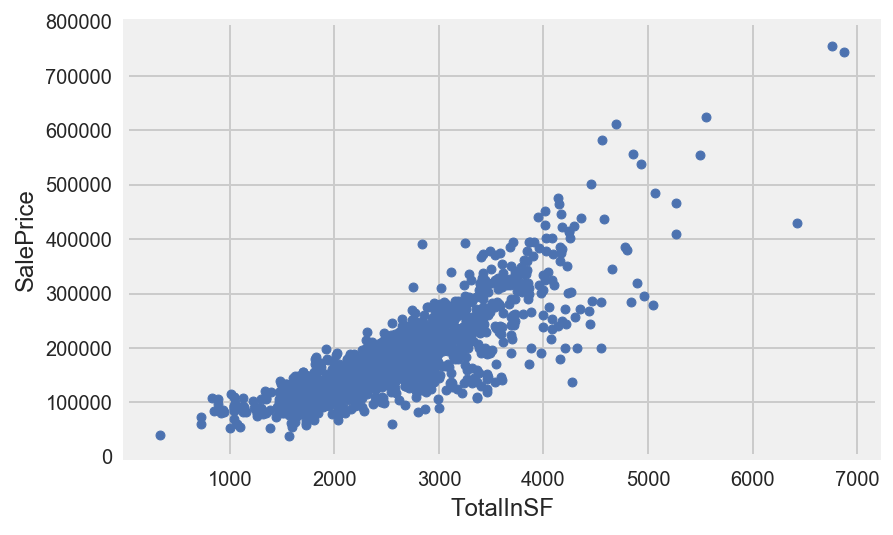

In [21]:
var = 'TotalInSF'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

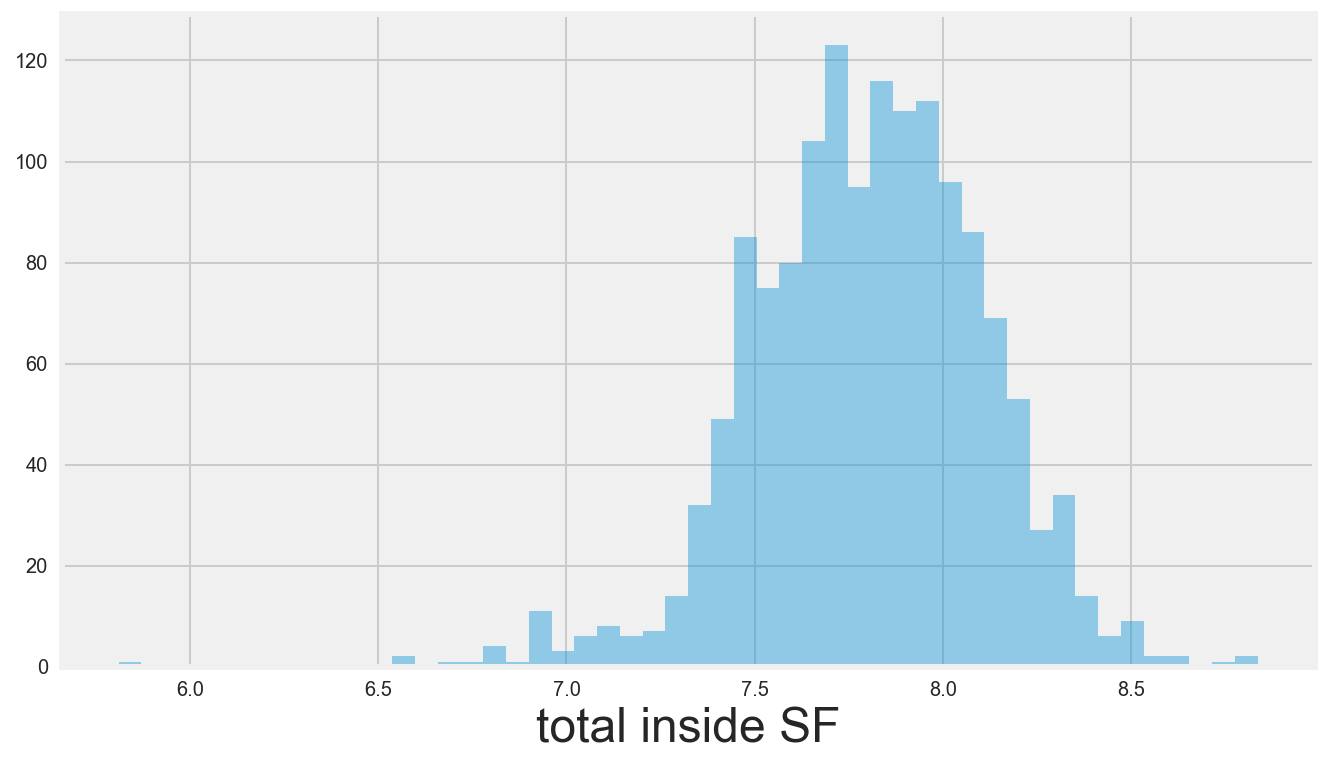

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(np.log(house.TotalInSF.values), bins=50, kde=False)
plt.xlabel('total inside SF', fontsize=24)
plt.show()


In [23]:
# We are making progress on narrowing down our features,
# Next I want to address what might seem controversial but I belive it fits my process so far.
# I am going to drop sales that were not normal and that also gets rid of NEW sales
# which fits because we are a company for fixer uppers I am looking to build a model that predicts well
# on more normal things and not abnormal outlier homes.
# we are also trying to predict the sale value of a home and not the type of contracts involved

In [24]:
house.SaleType.value_counts()

WD       1260
New       120
COD        41
ConLD       7
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [25]:
house.SaleCondition.value_counts()

Normal     1193
Partial     123
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [26]:
house = house[house.SaleCondition == 'Normal']

In [27]:
house.SaleCondition.value_counts()

Normal    1193
Name: SaleCondition, dtype: int64

In [28]:
house.SaleType.value_counts()

WD       1157
COD        18
ConLw       5
ConLD       5
ConLI       4
Con         2
CWD         2
Name: SaleType, dtype: int64

In [29]:
# since all my sales are the same I can drop this column

#house = house.drop('SaleCondition', axis=1)

In [30]:
# 
house = house.drop('SaleType', axis=1)

In [31]:
# I am sacrificing GarageCars for GarageArea since area had a stronger relationship, once again
# all of this narrowing down will make my final model easier to understand and to see what effects quality 
# and condition will have

house = house.drop('GarageCars', axis=1)

In [32]:
# and of course Id
house = house.drop('Id', axis=1)

In [33]:
# Going deeper into my categorical data, these are categories that had strong enough representation
# but I intuitivley thought I could turn these things into yes or no's since thats what I believe
# the consumer will do, for example, either you have a fireplace or you don't.

house['Street'] = house.Street.map(lambda x: 1 if x == "Pave" else 0)

house['LandSlope'] = house.LandSlope.map(lambda x: 1 if x == "Gtl" else 0)

house['CentralAir'] = house.CentralAir.map(lambda x: 1 if x == "Y" else 0)

house['PavedDrive'] = house.PavedDrive.map(lambda x: 1 if x == "Y" else 0)

house['Fireplaces'] = house.Fireplaces.map(lambda x: 1 if x > 1 else 0)

house['Heating'] = house.Heating.map(lambda x: 1 if x == 'GasA' else 0)

house['Functional'] = house.Functional.map(lambda x: 1 if x == 'Typ' else 0)

house['Condition1'] = house.Condition1.map(lambda x: 1 if x == 'Norm' else 0)

house['Condition2'] = house.Condition2.map(lambda x: 1 if x == 'Norm' else 0)

house['Electrical'] = house.Electrical.map(lambda x: 1 if x == 'SBrkr' else 0)

house['LandContour'] = house.LandContour.map(lambda x: 1 if x == 'Lvl' else 0)

house['LotShape'] = house.LotShape.map(lambda x: 1 if x == 'Reg' else 0)

house['LotFrontage'] = house.LotFrontage.map(lambda x: x if x > 0 else 0)
#street frontage I used the mean
house['LotFrontage'] = house.LotFrontage.map(lambda x: np.mean(house.LotFrontage) if x == 0 else x)

In [34]:
# Now we will go into dummyland, and explore all the categories i deemed worthy of getting dummies

In [35]:
dummyhood = pd.get_dummies(house['Neighborhood'])
dummyhood.drop('Veenker', axis=1, inplace=True)
house = pd.concat([house, dummyhood], axis=1)

dummybldg = pd.get_dummies(house['BldgType'])
dummybldg.drop('2fmCon', axis=1, inplace=True)
house = pd.concat([house, dummybldg], axis=1)

dummyfound = pd.get_dummies(house['Foundation'])
dummyfound.drop('Wood', axis=1, inplace=True)
house = pd.concat([house, dummyfound], axis=1)

dummystyle = pd.get_dummies(house['HouseStyle'])
dummystyle.drop('2.5Fin', axis=1, inplace=True)
house = pd.concat([house, dummystyle], axis=1)

dummyconfig = pd.get_dummies(house['LotConfig'])
dummyconfig.drop('FR3', axis=1, inplace=True)
house = pd.concat([house, dummyconfig], axis=1)

dummyzone = pd.get_dummies(house['MSZoning'])
dummyzone.drop('RH', axis=1, inplace=True)
house = pd.concat([house, dummyzone], axis=1)

dummyex1 = pd.get_dummies(house['Exterior1st'])
dummyex1.drop('CBlock', axis=1, inplace=True)
house = pd.concat([house, dummyex1], axis=1)

dummyex2 = pd.get_dummies(house['Exterior2nd'])
dummyex2.drop('CBlock', axis=1, inplace=True)
house = pd.concat([house, dummyex2], axis=1)

house = house.drop('Neighborhood', axis=1)

house = house.drop('Foundation', axis=1)

house = house.drop('BldgType', axis=1)

house = house.drop('HouseStyle', axis=1)

house = house.drop('LotConfig', axis=1)

house = house.drop('Exterior1st', axis=1)

house = house.drop('Exterior2nd', axis=1)

house = house.drop('MSZoning', axis=1)

In [36]:
# Here I am converting some categorical features to numbers

house['ExterCond'] = house.ExterCond.map(lambda x: 5 if x == 'Ex' else x)

house['ExterCond'] = house.ExterCond.map(lambda x: 4 if x == 'Gd' else x)

house['ExterCond'] = house.ExterCond.map(lambda x: 3 if x == 'TA' else x)

house['ExterCond'] = house.ExterCond.map(lambda x: 2 if x == 'Fa' else x)

house['ExterCond'] = house.ExterCond.map(lambda x: 1 if x == 'Po' else x)

house['GarageCond'] = house.GarageCond.map(lambda x: 5 if x == 'Ex' else x)

house['GarageCond'] = house.GarageCond.map(lambda x: 4 if x == 'Gd' else x)

house['GarageCond'] = house.GarageCond.map(lambda x: 3 if x == 'TA' else x)

house['GarageCond'] = house.GarageCond.map(lambda x: 2 if x == 'Fa' else x)

house['GarageCond'] = house.GarageCond.map(lambda x: 1 if x == 'Po' else x)

house['GarageCond'] = house.GarageCond.fillna(0)

house['BsmtCond'] = house.BsmtCond.map(lambda x: 5 if x == 'Ex' else x)

house['BsmtCond'] = house.BsmtCond.map(lambda x: 4 if x == 'Gd' else x)

house['BsmtCond'] = house.BsmtCond.map(lambda x: 3 if x == 'TA' else x)

house['BsmtCond'] = house.BsmtCond.map(lambda x: 2 if x == 'Fa' else x)

house['BsmtCond'] = house.BsmtCond.map(lambda x: 1 if x == 'Po' else x)

house['BsmtCond'] = house.BsmtCond.fillna(0)

house['KitchenQual'] = house.KitchenQual.map(lambda x: 5 if x == 'Ex' else x)

house['KitchenQual'] = house.KitchenQual.map(lambda x: 4 if x == 'Gd' else x)

house['KitchenQual'] = house.KitchenQual.map(lambda x: 3 if x == 'TA' else x)

house['KitchenQual'] = house.KitchenQual.map(lambda x: 2 if x == 'Fa' else x)

house['KitchenQual'] = house.KitchenQual.apply(lambda x: 1 if x == 'Po' else x)

# feature engineering of total finished basement 

house['totbsmtfinsf'] = house[u'BsmtFinSF1'] + house[u'BsmtFinSF2']

house['totbsmtfinsf'] = house.totbsmtfinsf.apply(lambda x: 0. if x == 0 else x)

In [37]:
house['SaleCondition'] = house.SaleCondition.map(lambda x: 1 if x == 'Normal' else x)

In [38]:
house.columns

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'Street', u'LotShape',
       u'LandContour', u'Utilities', u'LandSlope', u'Condition1',
       u'Condition2',
       ...
       u'HdBoard', u'ImStucc', u'MetalSd', u'Plywood', u'Stone', u'Stucco',
       u'VinylSd', u'Wd Sdng', u'Wd Shng', u'totbsmtfinsf'],
      dtype='object', length=128)

In [39]:
house.columns[45:55]

Index([u'PavedDrive', u'MoSold', u'YrSold', u'SaleCondition', u'SalePrice',
       u'TotalInSF', u'TotalOutSF', u'totalbath', u'Blmngtn', u'Blueste'],
      dtype='object')

In [40]:
# After sorting through my columns these are things I deemed not refurbishable without large scale 
# construction, replacing roof material and outdoor material is much more intense than 
# finishing a basement, installing central heating and air is also a large scale effortb

features = house[[u'PavedDrive','SalePrice','YrSold',
       u'totbsmtfinsf',u'BsmtCond', 'LotFrontage',u'GarageCond',
       u'KitchenQual',u'ExterCond',u'MSSubClass', u'LotArea', u'Street',
       u'LotShape', u'LandContour', u'LandSlope',u'Condition1', u'Condition2', 
       u'YearBuilt',u'Heating', u'Electrical',
       u'LowQualFinSF', u'KitchenAbvGr',
       u'Functional', u'Fireplaces',u'GarageArea', u'MoSold',
       u'TotalInSF', u'TotalOutSF', u'Blmngtn', u'Blueste',
       u'BrDale', u'BrkSide', u'ClearCr', u'CollgCr', u'Crawfor', u'Edwards',
       u'Gilbert', u'IDOTRR', u'MeadowV', u'Mitchel', u'NAmes', u'NPkVill',
       u'NWAmes', u'NoRidge', u'NridgHt', u'OldTown', u'SWISU', u'Sawyer',
       u'SawyerW', u'Somerst', u'StoneBr', u'Timber',u'1Fam', u'Duplex', u'Twnhs', u'TwnhsE', u'BrkTil',
       u'CBlock', u'PConc', u'Slab', u'Stone', u'1.5Fin', u'1.5Unf', u'1Story', u'2.5Unf', u'2Story',
       u'SFoyer', u'SLvl',u'Corner', u'CulDSac', u'FR2', u'Inside', u'FV', u'RL', u'RM',
       u'AsbShng', u'AsphShn', u'BrkComm', u'BrkFace', u'CemntBd', u'HdBoard',
       u'ImStucc', u'MetalSd', u'Plywood', u'Stucco', u'VinylSd', u'Wd Sdng',
       u'WdShing', u'AsbShng', u'AsphShn', u'Brk Cmn', u'BrkFace', u'CmentBd',
       u'HdBoard', u'ImStucc', u'MetalSd', u'Plywood', u'Stone', u'Stucco',
       u'VinylSd', u'Wd Sdng','OverallCond']]

In [41]:
# better but thats still alot of columns
len(features.columns)

124

In [42]:
# Before we model, one last check for null values


In [43]:


pre10 = features[features['YrSold'] != 2010]
test10 = features[features['YrSold'] == 2010]



test10y = test10.SalePrice.values
test10x = test10


In [44]:
test10x = test10x.drop('SalePrice', axis=1)

In [80]:
#set our target

seperatey = pre10['SalePrice'].values


In [81]:
features = pre10.drop('SalePrice', axis=1)

In [82]:
X = features
y = seperatey
newy = np.log(y)

In [83]:
ss = StandardScaler()

Xs = ss.fit_transform(X)
Xs10 = ss.fit_transform(test10x)


In [84]:
# I train, test, split my data and i am using my log y since I already figured out it gave me better 
# predictions

X_train, X_test, y_train, y_test = train_test_split(Xs, newy, train_size=0.7, random_state=2)

In [85]:
# I need to narrow down my features to there optimum Coefficients and remove some columns in the process so
# I turn to lasso regularization

optimal_lasso = LassoCV(n_alphas=1000, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00276439879489


....................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.6s finished


In [86]:
# I fit my optimum alpha that restrains my coefficients and test on the test set!

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_test, y_test, cv=10)

print lasso_scores
print np.mean(lasso_scores)
print np.std(lasso_scores)


[ 0.87096073  0.76968595  0.91644896  0.85272981  0.94125885  0.90146226
  0.87006384  0.86493295  0.77702285  0.89312409]
0.86576902881
0.0525484887957


### I use training data to tune the model and then fresh test data to score my model. A r^2 value of 0.91 means 91% of the variance was predicted by my Lasso model.

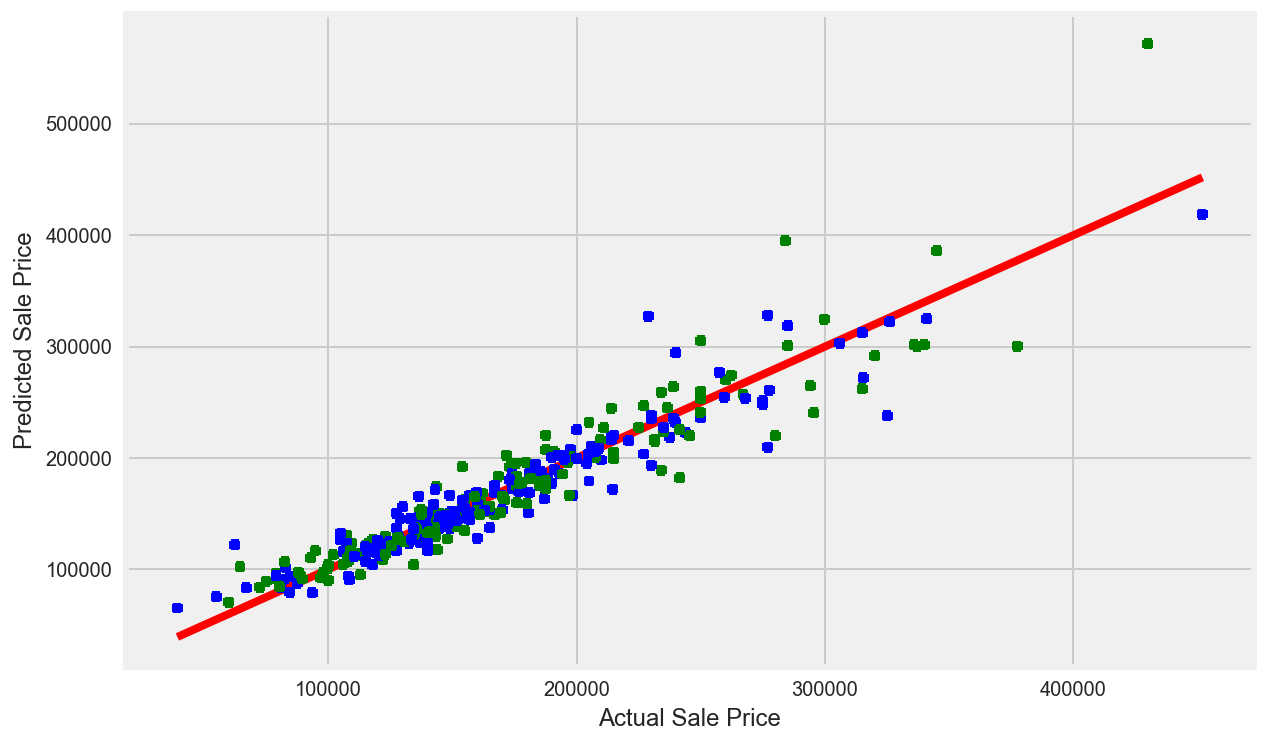

score:  0.914215240961


In [87]:
model = lasso.fit(X_train, y_train)

newyy = lasso.predict(X_test)
predictions  =  np.exp(newyy)
score        =  model.score(Xs10, np.log(test10y))

# Plot the model
plt.figure(figsize=(9,6))
plt.scatter(np.exp(y_test), predictions, s=30, c=['b','g'], marker='+', zorder=10)
plt.plot([np.exp(min(y_test)),np.exp(max(y_test))],[np.exp(min(y_test)),np.exp(max(y_test))],c='r')
plt.ylabel("Predicted Sale Price")
plt.xlabel("Actual Sale Price")
plt.show()

print "score: ", score

### I can now look at which features my regularization algorithm gave the highest coefficients too

In [88]:
lasso.fit(X_train, y_train)
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':np.exp(lasso.coef_),
                            'abs_coef':np.abs(np.exp(lasso.coef_))})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head()

,abs_coef,coef,variable
25,1.201619,1.201619,TotalInSF
16,1.090746,1.090746,YearBuilt
122,1.060527,1.060527,OverallCond
26,1.046054,1.046054,TotalOutSF
6,1.037761,1.037761,KitchenQual
